# EMAIL SPAM DETECTION BY USING MACHINE LEARNING

We’ve all been the recipient of spam emails before. Spam mail, or junk mail, is a type of email
that is sent to a massive number of users at one time, frequently containing cryptic messages, scams, or most dangerously, phishing content.

In this Project, use Python to build an email spam detector. Then, use machine learning to
train the spam detector to recognize and classify emails into spam and non-spam.

## SET UP

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder # Importing Label Encoder from scikit-learn
from wordcloud import WordCloud, STOPWORDS # Importing necessary libraries for creating WordCloud


### Loading the dataset

In [2]:
#Reading the CSV file into a DataFrame
df = pd.read_csv('spam.csv', encoding="latin-1", usecols=["v1", "v2"])

# Displaying the DataFrame
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


## DATA PROCESSING

### Renaming the columns

In [3]:
# Renaming the columns to enhance readability
df.rename(columns={"v1": "Category", "v2": "Message"}, inplace=True)

# Displaying the DataFrame with updated column names
df


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


### Converting category colmn into numeric

In [4]:
# Creating a LabelEncoder instance
le = LabelEncoder()

# Encoding the 'Category' column (spam or non-spam) with numerical labels
df["Category"] = le.fit_transform(df["Category"])

# Displaying the DataFrame with the encoded 'Category' column
df

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


## ANALYZING DATA

### Checking Shape of dataset

In [5]:
# Shape of the dataset
df.shape

(5572, 2)

### Displaying information about the dataset



In [6]:
# Displaying information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   int32 
 1   Message   5572 non-null   object
dtypes: int32(1), object(1)
memory usage: 65.4+ KB


### Checking for null values

In [7]:
# Checking for null values in the DataFrame
df.isnull().sum()


Category    0
Message     0
dtype: int64

### Checking for duplicate values

In [8]:
# Checking for duplicate values in the DataFrame
df.duplicated().sum()


403

### Dropping duplicate

In [9]:
# Dropping duplicate rows in the DataFrame, keeping the first occurrence
df = df.drop_duplicates(keep="first")

# Checking for duplicate values after dropping
df.duplicated().sum()

0

### Displaying the updated shape of the DataFrame



In [10]:
# Displaying the updated shape of the DataFrame
df.shape

(5169, 2)

### Displaying counts of 'Ham' (0) and 'Spam' (1)

In [11]:
# Displaying counts of 'Ham' (0) and 'Spam' (1) in the 'Category' column
df["Category"].value_counts()

0    4516
1     653
Name: Category, dtype: int64

## DATA VISUALIZATION

### Pie Chart for the distribution of 'Ham' and 'Spam'

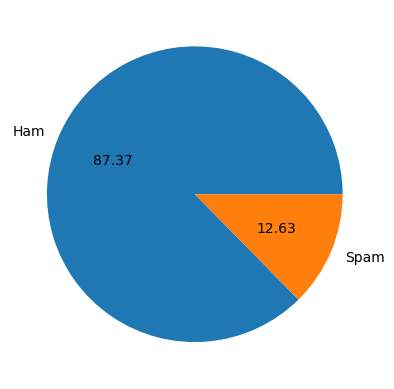

In [12]:
# Creating a Pie Chart for the distribution of 'Ham' and 'Spam' in the 'Category' column
plt.pie(df["Category"].value_counts(), autopct="%.2f", labels=['Ham', 'Spam'])
plt.show()


### Bar Chart for the class distribution of 'Ham' and 'Spam'

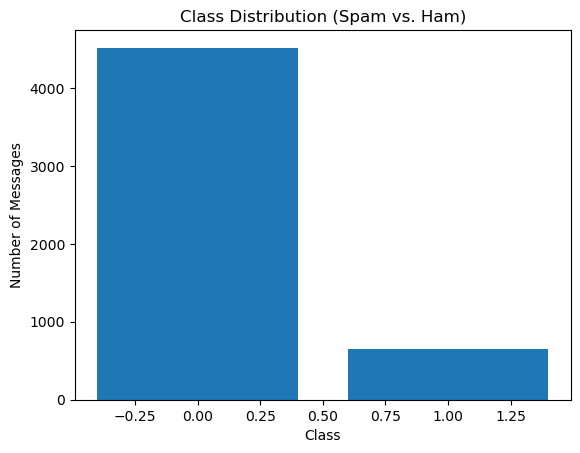

In [13]:
# Creating a Bar Chart for the class distribution of 'Ham' and 'Spam' in the 'Category' column
class_counts = df['Category'].value_counts()

# Plotting the bar chart with x-axis as class labels (0 and 1) and y-axis as counts
plt.bar(class_counts.index, class_counts.values)

# Adding labels to x-axis and y-axis for better readability
plt.xlabel('Class')
plt.ylabel('Number of Messages')

# Setting the title of the chart
plt.title('Class Distribution (Spam vs. Ham)')

# Displaying the chart
plt.show()


### Visualize the distribution of message lengths for both spam and ham messages
### 'Ham' (0) and 'Spam' (1)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7728\3911043851.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Message_Length'] = df['Message'].apply(len)


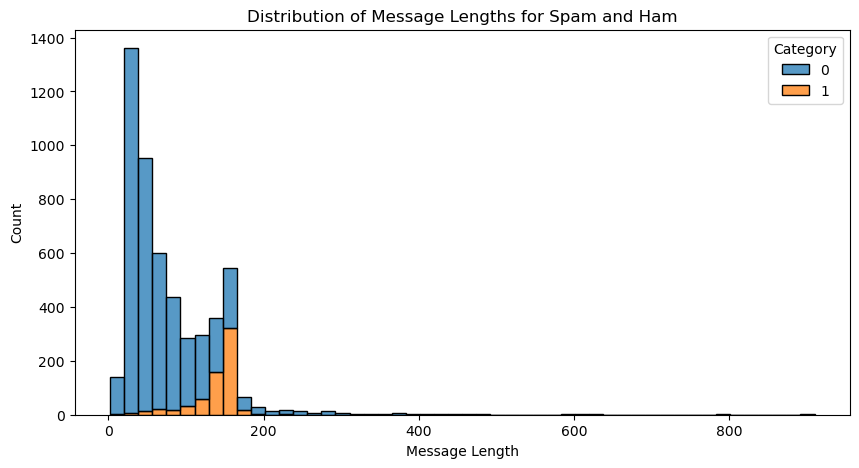

In [14]:
# Adding a new column 'Message_Length' to the DataFrame, representing the length of each message
df['Message_Length'] = df['Message'].apply(len)

# Creating a new figure with a specified size (width=10, height=5) for the histogram
plt.figure(figsize=(10, 5))

# Plotting a histogram using Seaborn, with x-axis as 'Message_Length', differentiating by 'Category' (spam or ham)
sns.histplot(df, x='Message_Length', hue='Category', multiple='stack', bins=50)

# Adding labels to x-axis and y-axis for better interpretation
plt.xlabel('Message Length')
plt.ylabel('Count')

# Setting the title of the histogram
plt.title('Distribution of Message Lengths for Spam and Ham')

# Displaying the histogram
plt.show()

### Visualizing the relationship between message lengths and message categories

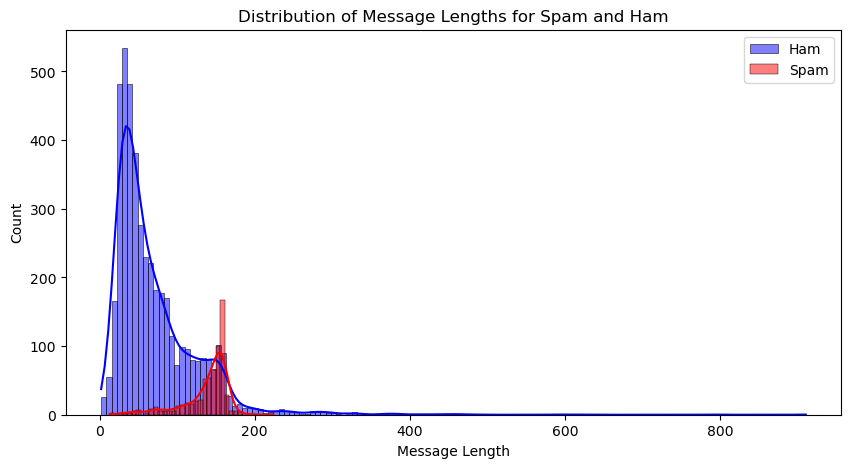

In [15]:
# Creating separate histograms for 'Ham' and 'Spam' messages
plt.figure(figsize=(10, 5))
sns.histplot(df[df['Category'] == 0]['Message_Length'], color='blue', label='Ham', kde=True)
sns.histplot(df[df['Category'] == 1]['Message_Length'], color='red', label='Spam', kde=True)

# Adding labels to x-axis and y-axis for better interpretation
plt.xlabel('Message Length')
plt.ylabel('Count')

# Adding a title to the histogram
plt.title('Distribution of Message Lengths for Spam and Ham')

# Adding a legend to clarify which color corresponds to 'Ham' and 'Spam'
plt.legend()

# Displaying the histogram
plt.show()


### Heatmap for visualizing the correlations

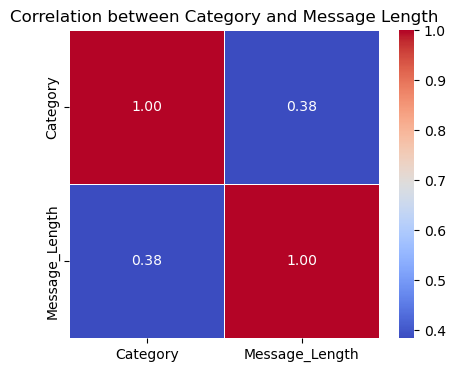

In [16]:
# Selecting relevant columns for correlation analysis
correlation_columns = df[['Category', 'Message_Length']]

# Calculating the correlation matrix for the selected columns
correlation_matrix = correlation_columns.corr()

# Creating a heatmap to visualize the correlation between 'Category' and 'Message_Length'
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Adding a title to the heatmap
plt.title('Correlation between Category and Message Length')

# Displaying the heatmap
plt.show()


### Generate a word cloud visualization based on the words present in the 'Message' column of your DataFrame.

In [17]:
# Initializing an empty string to store words from the 'Message' column
comment_words = ''

# Setting up a set of stopwords for WordCloud
stopwords = set(STOPWORDS)

# Iterating through each message in the 'Message' column
for val in df.Message:
    val = str(val)
    # Splitting the message into tokens
    tokens = val.split()
    
    # Converting each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    
    # Joining the lowercase tokens to the 'comment_words' string
    comment_words += " ".join(tokens)+" "

# Generating WordCloud with specified parameters
wordcloud = WordCloud(width=800, height=600,
                      background_color='#f8f8ff',
                      stopwords=stopwords,
                      min_font_size=10).generate(comment_words)


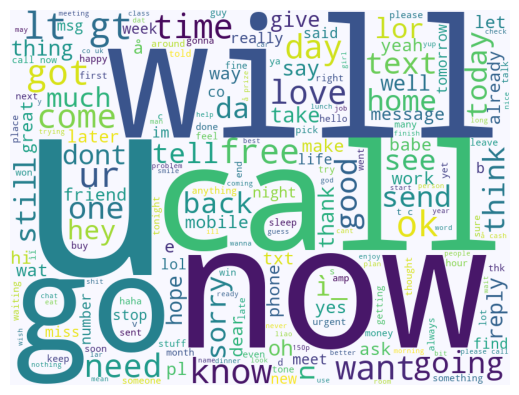

In [18]:
plt.figure(figsize = (5,5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

## MODEL

In [19]:
# Extracting the 'Message' column from the DataFrame and assigning it to the variable 'x'
x = df['Message']

# Displaying the content of the 'x' variable (the 'Message' column)
x


0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5169, dtype: object

In [20]:
# Extracting the 'Category' column from the DataFrame and assigning it to the variable 'y'
y = df["Category"]

# Displaying the content of the 'y' variable (the 'Category' column)
y


0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Category, Length: 5169, dtype: int32

### Splitting the data into train and test data


In [21]:
# Importing the train_test_split function from scikit-learn
from sklearn.model_selection import train_test_split

# Splitting the 'x' and 'y' data into training and testing sets
# The test_size parameter determines the proportion of the dataset to include in the test split
# The random_state parameter ensures reproducibility of the split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


### Training The Model

In [22]:
# Importing the CountVectorizer from scikit-learn
from sklearn.feature_extraction.text import CountVectorizer

# Creating an instance of CountVectorizer
vectorizer = CountVectorizer()

# Fitting the vectorizer on the training data to build the vocabulary
vectorizer.fit(x_train)

# Transforming the training and testing data into feature vectors using the fitted vectorizer
X_train_cv = vectorizer.transform(x_train)
X_test_cv = vectorizer.transform(x_test)


In [23]:
# Importing LogisticRegression from scikit-learn's linear_model module
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Creating an instance of Logistic Regression
logreg = LogisticRegression()

# Training the Logistic Regression model on the training data
logreg.fit(X_train_cv, y_train)


LogisticRegression()

### Accuracy

In [24]:
# Making predictions on the test set using the trained Logistic Regression model
y_pred = logreg.predict(X_test_cv)

# Calculating and printing the accuracy of the logistic regression classifier on the test set
accuracy = logreg.score(X_test_cv, y_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(accuracy))


Accuracy of logistic regression classifier on test set: 0.98


### Confusion Matrix

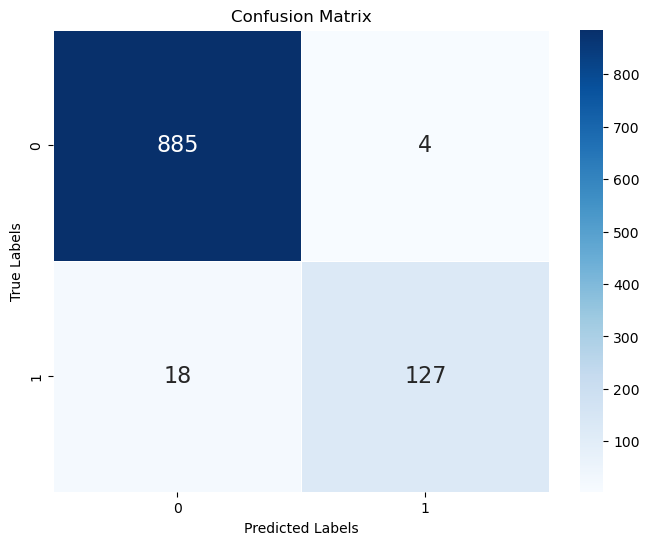


Precision: 0.97
Recall: 0.88


In [26]:
# Importing necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Generating the confusion matrix by comparing the true labels (y_test) with the predicted labels (y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Creating a seaborn heatmap for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, annot_kws={"size": 16})

# Adding labels and title for better interpretation
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Displaying the confusion matrix heatmap
plt.show()

# Extracting values for better interpretation
true_negative, false_positive, false_negative, true_positive = conf_matrix.ravel()

# Calculating and printing additional metrics for evaluation
precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)

print(f"\nPrecision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


### Classification Report

In [27]:
# Importing classification_report from scikit-learn's metrics module
from sklearn.metrics import classification_report

# Generating and printing a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       889
           1       0.97      0.88      0.92       145

    accuracy                           0.98      1034
   macro avg       0.97      0.94      0.95      1034
weighted avg       0.98      0.98      0.98      1034



In [28]:
# Importing necessary metrics from scikit-learn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculating and storing accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Printing the calculated metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


Accuracy: 0.9787234042553191
Precision: 0.9694656488549618
Recall: 0.8758620689655172
F1 score: 0.9202898550724637


## CUSTOM WORD PREDICTION

In [29]:
# Importing MultinomialNB from scikit-learn's naive_bayes module
from sklearn.naive_bayes import MultinomialNB

# Creating an instance of Multinomial Naive Bayes classifier
classifier = MultinomialNB()

# Training the classifier on the training data using Count Vectorized features (X_train_cv) and corresponding labels (y_train)
classifier.fit(X_train_cv, y_train)


MultinomialNB()

In [ ]:
# Defining a custom word for prediction
custom_word = "Offer for internship"

# Transforming the custom word into a Count Vector representation using the fitted vectorizer
custom_word_vec = vectorizer.transform([custom_word])

# Making a prediction using the trained Multinomial Naive Bayes classifier
prediction = classifier.predict(custom_word_vec)[0]

# Converting the numerical prediction to human-readable labels
if prediction == 1:
    prediction = "Spam"
else:
    prediction = "Ham"

# Printing the prediction result for the custom word
print(f"Custom word '{custom_word}' is predicted as: {prediction}")
